# Ohjeita Pythonin käyttöön Jupyterilla

Tähän tiedostoon on koottu joitain tärkeimpiä tietoja Pythonin toiminnasta ja erilaisia funktioita joista voi olla hyötyä alkuun pääsemisessä. Mukaan on laitettu muutamia esimerkkejä niiden toiminnasta.

Jos et muista miten jokin toiminto näissä notebookeissa menikään, paina **h**-painiketta kun et ole valinnut mitään soluja ja näet listan Jupyterin pikanäppäimistä.

1. Lähtökohdat
2. Paketit
3. Tietorakenteet ja datan käsittely
4. Peruslaskutoimitukset
5. Satunnaisdatan luominen
6. Kuvaajien piirtäminen
7. Ongelmia? Katso tänne

### 1. Lähtökohdat

Ohjelmoinnissa **muuttujiin** voidaan tallentaa erilaisia arvoja, joita halutaan käyttää tai muuttaa myöhemmin. Erilaisia muuttujatyyppejä ovat esimerkiksi kokonaisluku (int), liukuluku (float) ja merkkijono (string). Pythonissa muuttujien luominen on helppoa, sillä muuttujatyyppiä ei tarvitse erikseen määrittää.

Joskus ohjelmaa ajavaan ytimeen, **kerneliin**, jää muistiin palasia jotka haittaavat ohjelman toimintaa. Tätä sattuu aina välillä, ei hätää. Paina ylävalikoista 'Kernel' ja 'Restart & Clear Output', jolloin muistissa olevat prosessit ja tulosteet pyyhitään ja voit aloittaa alusta. Tämä ei kuitenkaan vaikuta mihinkään muutoksiin tekstissä tai koodissa, eli se ei ole virheiden korjausnappi.

### 2. Paketit

Python on tieteelliseen laskentaan soveltuva ohjelmointikieli, jolle on kehitetty monenlaisia eri tavalla suoritusteholtaan optimoituja toimintoja. Sen perusperiaatteisiin kuuluu erilaisten pakettien, eli funktiokirjastojen, käyttäminen. Nämä paketit tuodaan **import**-komennolla käyttöön ja vaikka se saattaakin alkuun tuntua hienoiselta taikatempulta tietää mitä pitäisi kutsua, se selkeytyy nopeasti.

Jos vilkaiset Open Data -projektissa tarjottuja materiaaleja, huomaat että jokaisessa Github-kansiossamme on mukana tekstitiedosto "requirements.txt", jonka mukaan esimerkiksi [MyBinder](www.mybinder.org) osaa rakentaa Jupyterille työalustan. Sieltä näkee, että tärkeimmät paketit joita tulemme käyttämään ovat seuraavat:

In [1]:
# Oleellisimmat paketit:

import pandas as pd   # sisältää erilaisia datan lukemiseen liittyviä työkaluja
import numpy as np   # sisältää erilaisia numeerisen laskennan työkaluja
import matplotlib.pyplot as plt  # sisältää kuvaajien (plot) piirtotyökaluja

# Muita hyödyllisiä paketteja:

import random as rand   # sisältää funktioita satunnaislukujen generoimiseen
from scipy import stats    # sisältää tieteellistä laskentaa ja tilastolaskentaa
import matplotlib.mlab as mlab  # lisää kuvaajatyökaluja monimutkaisempiin kuvaajiin

# Ei paketti, mutta oleellinen komento joka mahdollistaa tulosten näkymisen nätisti harjoitteissa:

%matplotlib inline

Muista ajaa yllä oleva solu jos haluat että tämän notebookin esimerkit toimivat. Ylläolevan voisi kirjoittaa lyhemminkin ilman **as**-merkintää, joka nimeää paketit uudelleen, mutta sillä voidaan merkittävästi lyhentää tulevien solujen tekstejä. Jos haluat lukea paketeista tarkemmin, valitse ylempää pudotusvalikko 'Help' ja löydät sieltä linkkejä tarkempiin dokumentaatioihin tai muotoiluohjeisiin. 

Paketteja on paljon muitakin ja niitä voi tarpeen mukaan googlailla lisää, jos johonkin tarvitsee. Pythonin laajan käyttäjäkunnan ansiosta verkosta löytää helposti tuhansittain esimerkkejä ja hakemistoja. [StackExchange](https://stackexchange.com/) ja [StackOverflow](https://stackoverflow.com/) ovat hyviä paikkoja vastausten etsimiseen.

### 3. Tietorakenteet ja datan käsittely

**Kooste:**

Csv-luku $\rightarrow$ 
``` Python 
nimi = pd.read_csv('polku', muotoiluargumentteja)
```  
Taulukon luku $\rightarrow$ 
``` Python
pd.read_table('polku', muotoiluargumentteja)
``` 
Sisällön tarkastelu $\rightarrow$ 
``` Python
nimi.head(n)  
``` 
Pituus $\rightarrow$ 
``` Python
len(nimi)  
``` 
Muoto $\rightarrow$ 
``` Python
nimi.shape 
``` 
Sarakkeet $\rightarrow$ 
``` Python
nimi.sarake 
nimi['sarake'] 
``` 
Tietyn välin rajaus $\rightarrow$ 
``` Python
nimi[(nimi.arvosarake >= alaraja) & (nimi.arvosarake <= yläraja)]  
``` 
Tekstin etsintä $\rightarrow$ 
``` Python
vanhaNimi['sarake'].str.contains('haettu_pätkä')  
``` 
Lisää sarake $\rightarrow$ 
``` Python
nimi = nimi.assign(sarake = tiedot) 
``` 
Poista sarakkeita $\rightarrow$ 
``` Python
nimi.drop(['sarake1','sarake2'...], axis = 1)
``` 




CMS-kokeen avoin data on .csv-muotoista, eli pilkuilla erotettua tekstipuuroa (comma separated values). Tällainen tieto on hyvin helppoa lukea taulukkona tietokoneen käyttöön *pandas*-paketin avulla, jolloin koneen muistiin syntyy kaksiulotteinen ns. dataframe-muotoinen taulukko. Tarkempia tietoja [täällä](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), mistä löytyy myös yksityiskohtaisempi lista eri toiminnoista joita valitulle datalle voi tehdä.

Helpoimmat tavat lukea data käyttöön ovat **pd.read_csv** ja **pd.read_table**. Jos data on nättiä (erottajana pilkku, otsikointi on tehty, fontit eivät sodi tervettä järkeä vastaan...), yleensä mitään lisätoimenpiteitä ei tarvita.

In [ ]:
# Ladataan setti hiukkasdataa muuttujaksi ja määritetään sille haluttu nimi:

kaksoismyonit = pd.read_csv('Dimuon_Doublemu.csv')

Tällainen suora muoto hakee tiedoston, joka sijaitsee samassa kansiossa kuin käytössä oleva notebook. Tiedosto voidaan hakea myös suoraan verkko-osoitteen urlista tai toisesta kansiosta **'../kansio/tiedosto.csv'** -rakenteella.

Mikäli data on toisessa tekstimuodossa, voi kokeilla yleisempää **read_table** -käskyä, joka ymmärtää muitakin taulukoitavia tekstejä. Yleisin ongelma on, että teksti on eroteltu jollain muulla kuin pilkulla, kuten tabulaattorilla tai puolipisteellä. Tällöin komentoon voi laittaa argumentin **sep = 'x'**, missä x on erottimena käytetty merkki. Toinen yleinen ongelma on, että tiedoston rivitys alkaa omituisesti tai sarakkeiden otsikot ovat jossain muualla kuin ensimmäisellä rivillä. Tällöin voidaan laittaa komentoon argumentti **header = n**, missä n on otsikoiksi halutun rivin järjestysnumero. HUOM! Tietokone aloittaa järjestysluvut aina nollasta jollei toisin mainita.

Tarkempia tietoja mahdollisista argumenteista [täällä](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). 

Alla esimerkki datasta, jolla ei ole otsikkoriviä. Datassa näkyy Auringosta tehtyjä havaintoja vuodesta 1992 eteenpäin ja tarkemmat selosteet kunkin sarakkeen merkityksille löytyvät [täältä](http://sidc.oma.be/silso/infosndhem).

In [ ]:
# Ladataan setti aurinkodataa ja nimetään se halutulla tavalla:

aurinko = pd.read_table('auringonpilkut.csv', sep = ';', encoding = "ISO-8859-1")

Selkeyden vuoksi katsotaan miltä datamme näyttävät. Tähän sopii erinomaisesti **nimi.head(n)**-komento, joka näyttää n ensimmäistä riviä valitusta datasta. Oletusarvoisesti n = 5, jos laittaa tyhjät sulkeet.

In [ ]:
kaksoismyonit.head()

In [ ]:
aurinko.head()

Ylläolevista nähdään, että **aurinko**-muuttujan ensimmäinen oikea rivi on kaapattu otsikoiksi, mikä on sikäli ikävää että 1) nyt otsikot ovat hämääviä ja 2) meiltä jää yhden rivin verran dataa käsittelemättä jos haluamme vaikkapa kuvaajan taulukon jostain sarakkeesta. Ratkaistaan asia laittamalla dataa ladattaessa otsikointiargumentiksi **header = -1**, eli rivi jota ei ole olemassa, jolloin kone tuottaa siihen järjestyslukurivin.

In [ ]:
aurinko = pd.read_table('auringonpilkut.csv', sep = ';', encoding = "ISO-8859-1", header = -1)

In [ ]:
aurinko.head()

Jos haluamme muuttaa otsikoinnin selkeämmäksi, voimme tietysti myös nimetä sarakkeet **names = ['nimi','nimi2','nimi3']**-argumentilla.

In [ ]:
aurinko = pd.read_table('auringonpilkut.csv', sep=';', encoding = "ISO-8859-1", header = None, 
names = ['Vuosi','Kuukausi','Päivä','Fraktio','$P_{tot}$','$P_{poh}$','$P_{et}$','$\sigma_{tot}$','$\sigma_{poh}$',
         '$\sigma_{et}$','$N_{tot}$','$N_{poh}$','$N_{et}$','Prov'])

In [ ]:
aurinko.head()

**nimi.heads()**-komennon ohella pari muuta pikkukomentoa ovat hyödyllisiä tarkasteltaessa datan muotoa. **len(nimi)** kertoo rivien määrän eli muuttujan pituuden (length), **nimi.shape** sekä rivien että sarakkeiden määrän.

In [ ]:
# Normaalisti koodisolun tuloste näyttää vain viimeisimmän annetun toiminnon. Print()-komennolla saadaan
# useampia arvoja näkyviin. Voit kokeilla mitä käy jos poistat printin näiden edestä.

print (len(aurinko))
print (aurinko.shape)

Kun data on nyt saatu tyydyttävässä muodossa koneelle, sitä voidaan ryhtyä muokkaamaan halutun näköiseksi. Usein ollaan kiinnostuneita jostain yksittäisestä muuttujasta datan sisässä, jolloin pitää pystyä eristämään tiettyjä sarakkeita alkuperäisistä tiedoista tai valita vain ne rivit, joilla jonkin muuttujan arvo on tietyissä rajoissa.

Sarakkeen voi valita kirjoittamalla **nimi.sarake** tai **nimi['sarake']**. Hakasulkumuoto on tarpeen, jos sarakkeen nimi esimerkiksi alkaa numerolla, jonka kone saattaa tulkata järjestysluvuksi. Jos haluaa helpottaa elämäänsä eikä välitä muista sarakkeista, kannattaa tämä eristys tehdä uuteen muuttujaan, eli kirjoittaa **uusiNimi = nimi.sarake** ja käsitellä sitä. Tässä on sekin etu, että dataa on tällöin vähemmän kerrallaan käsittelyssä eikä tietokone mahdollisten kirjoitusvirheiden tapauksessa ala esimerkiksi piirtämään histogrammeja kymmenissä ulottuvuuksissa koko alkuperäisestä datasta ja tukehdu yrittäessään.

In [ ]:
# Erotellaan uuteen muuttujaan myonidatan invarianttien massojen sarake, joka on otsikoitu nimellä M.

iMassat = kaksoismyonit.M

In [ ]:
iMassat.head()

Rivien valinta tapahtuu luomalla vastaavasti uusi muuttuja, jonka alkioiksi valitaan ne alkuperäisen datan alkiot, jotka täyttävät annetut ehdot. Tällöin esimerkiksi jonkin arvovälin valinta olisi  
``` Python
uusiNimi = nimi[(nimi.arvosarake >= alaraja) & (nimi.arvosarake <= ylaraja)]
```
Sinänsä jakoehto voi olla mikä tahansa muukin looginen elementti, kuten tasan tietty luku tai tekstinpätkä ei-numeerisessa datassa.

In [ ]:
# Otetaan esimerkkinä hiukkasdatasta ne rivit, joissa molempien hiukkasten energia on 30 GeViä tai yli.

yli30 = kaksoismyonit[(kaksoismyonit.E1 >= 30) & (kaksoismyonit.E2 >= 30)]

In [ ]:
yli30.head()

In [ ]:
print (len(yli30))
print (len(kaksoismyonit))

Jos halutaan hakea tekstiä, voidaan kirjoittaa vaikkapa seuraavasti **nimi.loc[ ]**-funktion avulla. 
``` Python
uusiMuuttuja = vanhaMuuttuja.loc[vanhaMuuttuja['sarake'] == 'haluttu_asia']
```

Tällöin toki on tiedettävä tarkkaan mitä etsii. Jos haluaa kysyä datalta sokeammin kysymyksiä, **contains**-toiminto auttaa.
``` Python
uusiNimi = vanhaNimi['sarake'].str.contains('haettu_pätkä')
```
tekee uuden muuttujan, jossa on nyt haetun pätkän sisältäneet rivit. Oletusarvoisesti toiminto välittää kirjainkoosta, mutta sen voi laittaa pois päältä kirjoittamalla 
``` Python
uusiNimi = vanhaNimi['sarake'].str.contains('haettu_pätkä', case = False)
```
Myös negaatio toimii, kuten alla suomalaisten alkoholivalmistajien listan selaaminen poistamalla kaikki Oy tai Oyj yritykset. Samalla toki voi mennä joku Oy-alkuinen firma, joten kannattaa olla tarkkana.

In [ ]:
juomat = pd.read_csv('alkoholilupa_valmistus.csv', sep = ';', encoding = "ISO-8859-1", na_filter = False)

In [ ]:
juomat.head()

In [ ]:
tiettyValmistaja = juomat[juomat['Nimi'].str.contains('Oy') == False]
print (len(juomat))
print (len(tiettyValmistaja))


Jos haluat lisätä tai poistaa sarakkeita datasta, siihen sopivat toiminnot **nimi = nimi.assign(sarake = tiedot)** ja **nimi.drop(['sarake1','sarake2'...], axis = 1)**. Dropissa **axis** on sikäli tärkeä parametri, että komento ymmärtää poimia nimenomaan sarakkeen.

In [ ]:
# Sarakkeen poistaminen dropilla.
# Joskus .drop ei toimi suoraan, joten tallennetaan sen tulos aiemman muuttujan tilalle sekaannuksen välttämiseksi.

juomat = juomat.drop(['Nimi'], axis = 1)
juomat.head()

In [ ]:
# Sarakkeen lisääminen assignilla.
# Laitetaan tässä äskeiseen mukaan sarake R, jossa on numeroita. Huolehdi, että sarake on oikean mittainen.

luvut = np.linspace(0, 100, len(juomat))
 
juomat = juomat.assign(R = luvut)
juomat.head()


### 4. Peruslaskutoimitukset ja syntaksilogiikka

**Kooste:**

Itseisarvot $\rightarrow$ 
``` Python
abs(x)  
``` 
Neliöjuuret $\rightarrow$
```  Python
sqrt(x)  
``` 
Yhteenlasku $\rightarrow$ 
``` python
x + y 
``` 
Vähennyslasku $\rightarrow$
```  python
x - y  
``` 
Jakolasku $\rightarrow$
```  python
x/y  
``` 
Kertolasku $\rightarrow$
``` python
x*y  
``` 
Potenssit $\rightarrow$ 
```  python
x**y  
``` 
Suurin arvo $\rightarrow$
```  python
max(x)  
``` 
Pienin arvo $\rightarrow$ 
```  python
min(x)  
``` 
Oman funktion luominen $\rightarrow$ 
```  python
def nimi(syöte):
    toimitukset
    
``` 


Peruslaskutoimituksissa ei ole mitään erityisen ihmeellistä, ne kirjoitetaan siinä missä mihin tahansa muuhunkin tietokonelaskimeen. Jos haluaa ohjelman tulostavan useamman asian kerrallaan, kannattaa käyttää **print()**-komentoa jolloin muutakin kuin viimeisin vaihe tulee näkyviin. Tekstiä ja numeroita voi myös yhdistää, jolloin **repr(lukuja)** voi helpottaa. Tämä näppärä funktio palauttaa annetusta muuttujasta printattavan version. [Tästä](https://docs.python.org/3/library/functions.html) näppärästä listasta näkee mitä kaikkia sisäänrakennettuja funktioita Pythonissa on ilman pakettejakin, mm. pienimmän ja suurimman luvun etsimistä tiedostosta, lukujen pyöristämistä ja vastaavaa. Jos joku jäi ihmetyttämään, [tässä](https://docs.python.org/3/library/stdtypes.html) vielä lisää samasta asiasta.

In [ ]:
# Voit muokata 'luku'-muuttujan sisältöä eri laskuiksi.

luku = 14*2+5/2
teksti = 'Päivän tulos on: '
print (teksti + repr(luku))

In [ ]:
# Max() hakee joukon suurimman alkion.

kasaLukuja = [3,6,12,67,578,2,5,12,-34]

print('Suurin luku on ' + repr(max(kasaLukuja)))

Kiinnostavampaa on, että Pythonissa voi luoda myös omia funktioitaan tiettyihin tarpeisiin. Tällöin **määritellään** funktion nimi ja vaikutus sisään laitettuun tietoon kirjoittamalla  
``` Python
def funktionNimi(syöte):  
    kuvaus sisennettynä
```

In [ ]:
# Luodaan funktio, joka puolittaa sille syötetyn numeron.

def puolitus(a):
    print(a/2)
    
puolitus(6)

In [ ]:
# Tehdään summauskone, joka kysyy käyttäjältä kokonaislukuja.

def summaus(x, y):
    summa = x + y
    lause = '{} + {} on yhteensä {}.'.format(x, y, summa)
    print(lause)

def vapaaValinta():
    a = int(input("Anna kokonaisluku: "))
    b = int(input("Anna toinenkin kokonaisluku: "))
    summaus(a, b)

vapaaValinta() 

In [ ]:
# Luodaan funktio, joka palauttaa annetun radiaanilistan tulokset astelistana. While-silmukka käy läpi ensimmäisestä
# alkiosta haluttuun kohtaan asti listaa ja tekee alkioille jonkun toimituksen.

def kulmaus(a):
    i=0
    while i < len(a):
        a[i] = a[i]*360/(2*np.pi)
        i+=1
    return a;

radeja = [5,2,4,2,1,3]
kulmaus(radeja)
print(radeja)

In [ ]:
# Tai sama nätimmin for-silmukkana ihan samalla periaatteella:

def kulmain(a):
    for i in range(0,len(a)):
        a[i] = a[i]*360/(2*np.pi)
    return a;
    
rad = [1,2,3,5,6]
kulmain(rad)
print(rad)


### 5. Satunnaisdatan luominen

**Kooste:**

Satunnainen kokonaisluku $\rightarrow$ 
``` python
rand.randint(alin,ylin)
``` 
Satunnainen luku 0 ja 1 välillä $\rightarrow$ 
``` python
rand.random()  
``` 
Mielivaltainen joukko mahdollisista $\rightarrow$
``` python
rand.choices(joukko, painotukset, k = määrä)  
``` 
Mielivaltainen joukko populaatiosta $\rightarrow$ 
``` python
rand.sample(joukko, k = määrä)  
``` 
Normaalijakauma $\rightarrow$
``` python
rand.normalvariate(odotusarvo, keskihajonta)  
``` 
Tasainen lukujono $\rightarrow$ 
``` python
np.linspace(alku, loppu, num = jakojen lukumäärä)  
``` 
Tasainen lukujono $\rightarrow$ 
``` python
np.arange(alku, loppu, askelkoko)
``` 


Joskus on kiinnostavaa luoda oikean datan kaveriksi simuloituja tai satunnaisia mittauksia. Siinä missä vaikkapa monimutkaisempien [Monte Carlo -simulaatioiden](https://fi.wikipedia.org/wiki/Monte_Carlo_-simulaatio) tuottaminen meneekin tämän ohjeen tavoitteiden ulkopuolelle, voidaan silti vilkaista hieman erilaisia tapoja tuottaa satunnaisia numeroita. Tietokoneen tapauksessa on kuitenkin muistettava, että tavalliset satunnaisgeneraatiometodit ovat siinä mielessä pseudosatunnaisia deterministisiä prosesseja, ettei niitä kannata käyttää vaikkapa pankkisalaisuuksien tai turvalukujen kehittämiseen. Sitä varten on olemassa raskaampia ja monimutkaisempia keinoja.

In [ ]:
# Luodaan satunnainen kokonaisluku halutulta väliltä.

lottoarpa = rand.randint(1,100)
teksti = 'Päivän voittoarpa on: '
print (teksti + repr(lottoarpa))

In [ ]:
# Luodaan satunnainen liukuluku 0 ja 1 väliltä kerrottuna viidellä.

luku = rand.random()*5
print (luku)

In [ ]:
# Poimitaan satunnaisia jäseniä listalta, mutta tehdään tietyistä valinnoista todennäköisempiä.

nimiLapsille = ['Pekka','Jukka','Iida','Netta','Paula','Torsti']
todariPainot = [10,30,20,50,5,5]

# Määritetään montako nimeä halutaan, k = haluttu. Choices-komento voi ottaa saman tulokset useita kertoja.

nimet = rand.choices(nimiLapsille, weights = todariPainot, k = 3)
print(nimet)

In [ ]:
# Samanlainen valinta ilman toistoa.

oppilaat = ['Pekka','Jukka','Iida','Netta','Paula','Torsti']
kolmeVapaaehtoista = rand.sample(oppilaat, k = 3)
print (kolmeVapaaehtoista)

In [ ]:
# Satunnaisluku annetusta normaalijakaumasta (odotusarvo, keskihajonta).

luku = rand.normalvariate(3, 0.1)
print (luku)

In [ ]:
# Luodaan tasaisesti jaettu lukusuora 1 ja 10 väliltä ja satunnaistetaan sitä hieman.

lukusuora = np.linspace(1, 10, 200)

def satunnaistin(a):
    b = a.copy()
    
    for i in range(0,len(b)):
        b[i] = b[i]*rand.uniform(0,b[i])
    return b;

tulos = satunnaistin(lukusuora)
# print(lukusuora)
# print(tulos)

fig = plt.figure(figsize=(15, 10))
plt.plot(tulos,'g*')
plt.show()

In [ ]:
# Toinen tapa tuottaa tasaisesti jaettu lukujoukko [a,b[ komennolla arange(a,b,c) missä c on askeleen koko.
# Toiminto voi joskus häröillä jos c ei ole kokonaisluku. Huomaa, että b ei kuulu joukkoon.

luvut = np.arange(1,10,1)
print(luvut)

### 6. Kuvaajien piirtäminen

**Kooste:**

$\rightarrow$
``` python
``` 

Kuvaajat ovat kenties tärkein syy käyttää ohjelmointia tiedeopetuksessa. Isoistakin aineistoista on nopeaa ja vaivatonta tuottaa selkeyttäviä visualisaatioita. Kuhunkin tapaukseen sopii omanlaisensa metodi, joista yleisimpiä tarkastellaan tässä.

Kuvaajien värejä ja merkkejä voi vaihtaa vapaasti. [Täällä](https://matplotlib.org/api/markers_api.html?highlight=markers#module-matplotlib.markers) on lista ymmärretyistä grafiikoista.

In [ ]:
# Peruskuva plot-funktiolla. Jos parametreina toimii vain yksi tietorivi, x-akseli otetaan järjestysnumeroista.

lukuja = [1,3,54,45,52,34,4,1,2,3,2,4,132,12,12,21,12,12,21,34,2,8]
plt.plot(lukuja, 'b*')

# plt.show() on hyvä laittaa piirtojen loppuun. Kuvaajan saa näkyviin ilmankin, mutta joskus näkyviin tulisi pelkkä
# tiedostopaikka tai laskennallista sotkua. Tämä selkeyttää asioita, käytä sitä.

plt.show()

In [ ]:
# Kuvaajille on kuitenkin hyvä antaa nimiä, jotta niiden lukijallekin on selvää mitä tapahtuu. 
# Tässä näet miten eri osia voi nimetä.

# Kaksi satunnaista datasettiä.

tulos1 = np.linspace(10, 20, 50)*rand.randint(2,5)
tulos2 = np.linspace(10, 20, 50)*rand.randint(2,5)

# Piirretään molemmat.

plt.plot(tulos1, 'r^', label = 'Mittaus 1')
plt.plot(tulos2, 'b*', label = 'Mittaus 2')

# Nimetään akselit ja otsikot. Fontsize-parametrilla saa tekstit haluttuun kokoon.

plt.xlabel('Aika (s)', fontsize = 15)
plt.ylabel('Nopeus (m/s)', fontsize = 15)
plt.title('Liikkeen mittauksia \n', fontsize = 15) # \n luo uuden rivin otsikon muotoilua varten

# Lisätään selite. Jos loc-parametria ei määritellä, selite laitetaan automaattisesti johonkin mihin se mahtuu.

plt.legend(loc='upper left', fontsize = 15)

# Näytetään kuvaaja.

plt.show()

In [ ]:
# Myös trigonometrisia funktioita voidaan piirtää nätisti.

# Tehdään x-akseliksi tasainen lukusuora.

x = np.linspace(0, 10, 100)

# Määritetään piirrettävät funktiot-

y1 = np.sin(x)
y2 = np.cos(x)

# Piirretään kuvaajat.

plt.plot(x, y1, color = 'b', label = 'sin(x)')
plt.plot(x, y2, color = 'g', label = 'cos(x)')

plt.legend()

plt.show()

In [ ]:
# Kuvaajien oletuskoko Jupyterissa on jokseenkin pieni. figsize-komento auttaa skaalaamaan kuvia haluttuihin mittoihin.
# Toistetaan äskeinen kuvaaja.

x = np.linspace(0, 10, 100)

y1 = np.sin(x)
y2 = np.cos(x)

# Tässä määrätään koko. Voit testata miten lukujen muokkaus vaikuttaa.

fig = plt.figure(figsize=(15, 10))

plt.plot(x, y1, color = 'b', label = 'sin(x)')
plt.plot(x, y2, color = 'g', label = 'cos(x)')

plt.legend()

plt.show()

Toinen perinteinen kuvaaja on arvopareja piirtävä [scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html), jossa molemmat akselit ovat muuttujia. Hyvin yleinen esimerkiksi fysiikan tutkimuksessa.

In [ ]:
def satunnaistin(a):
    b = a.copy()
    for i in range(0,len(b)):
        b[i] = b[i]*rand.uniform(0,1)
    return b;

# Otetaan satunnaista dataa, jossa toinen arvo jakautuu välillä 0-5 ja toinen 0-20.

arvo1 = satunnaistin(np.linspace(3,5,100))
arvo2 = satunnaistin(np.linspace(10,20,100))

fig = plt.figure(figsize=(10,5))
plt.scatter(arvo1, arvo2, marker ='*', color = 'b')
plt.show()

In [ ]:
# Toinen scatter-esimerkki, jossa molemmat arvot
# hajoavat normaalijakauman mukaan odotetusta lineaarisesta riippuvuudesta.


def satunnaistaja(a):
    b = a.copy()
    for i in range(0,len(b)):
        b[i] = b[i]*rand.normalvariate(1, 0.1)
    return b;

arvo1 = satunnaistaja(np.linspace(3,5,100))
arvo2 = satunnaistaja(np.linspace(10,20,100))

fig = plt.figure(figsize=(10,5))
plt.scatter(arvo1, arvo2, marker ='*', color = 'b', label = 'Mittaukset')

# Lasketaan huvikseen mukaan myös suoran sovite pienimmällä neliösummalla.

slope, intercept, r_value, p_value, std_err = stats.linregress(arvo1, arvo2)
plt.plot(arvo1, intercept + slope*arvo1, 'r', label='Sovitus')

plt.legend(fontsize = 15)
plt.show()

# Jos haluaisi tietää suoran matemaattisia arvoja, voisi kirjoittaa esim. print (slope) jne.

Yksi merkittävä kuvaajatyyppi on histogrammi, jolla voidaan kuvata eri tulosten suhteellista esiintyvyyttä datassa. Histogrammeja näkee hyvin monissa paikoissa, niin hiukkasfysiikassa, lääketieteessä kuin yhteiskunnallisissakin tiedoissa.

In [ ]:
# Otetaan satunnainen ikäjakauma ja luodaan sitä kuvaava histogrammi.

def ikageneraattori(a):
    b = a.copy()
    for i in range(0, len(b)):
        b[i] = b[i]*rand.randint(1,100)
    return b;

iat = ikageneraattori(np.ones(1000))

fig = plt.figure(figsize = (10,5))
plt.hist(iat, bins = 100, range = (0,110))

plt.xlabel('Ikävuodet', fontsize = 15)
plt.ylabel('Määrä', fontsize = 15)
plt.title('Ikäjakauma %i ihmisen otoksessa \n' %(len(iat)), fontsize = 15 ) 

plt.show()

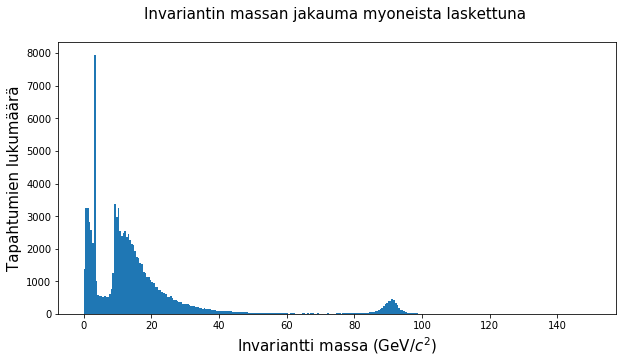

In [2]:
# Otetaan hiukkasdataa törmäyksistä, joista havaittiin tulevan myonipareja.

kaksoismyonit = pd.read_csv('Dimuon_Doublemu.csv')

# Piirretään koko roskan histogrammi invariantin massan, sarake M, suhteen.

fig = plt.figure(figsize = (10,5))
plt.hist(kaksoismyonit.M, bins = 300, range = (0,150))

plt.xlabel('Invariantti massa (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Tapahtumien lukumäärä', fontsize = 15)
plt.title('Invariantin massan jakauma myoneista laskettuna \n', fontsize = 15 ) 

plt.show()

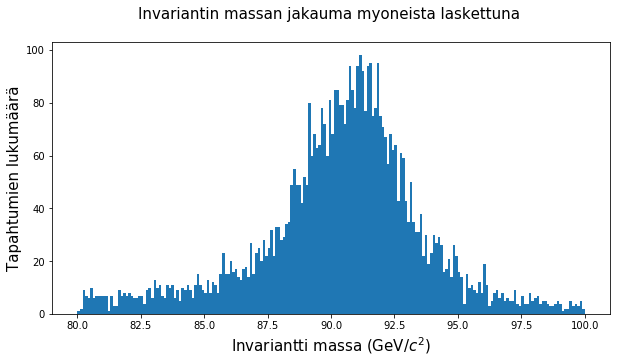

In [4]:
# Tarkastellaan ylläolevasta vain 80 ja 100 välillä olevaa aluetta. Tähän kävisi myös range-parametrin siirto,
# mutta on kevyempää rajata pienempi pala dataa käsittelyyn.

huippu = kaksoismyonit[(kaksoismyonit.M >= 80) & (kaksoismyonit.M <= 100)]


fig = plt.figure(figsize = (10,5))
plt.hist(huippu.M, bins = 200, range = (80,100))

plt.xlabel('Invariantti massa (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Tapahtumien lukumäärä', fontsize = 15)
plt.title('Invariantin massan jakauma myoneista laskettuna \n', fontsize = 15 ) 

plt.show()

Keskimäärin epälineaaristen käyrien sovittaminen tuloksiin vaatii hieman enemmän koodaamista, mutta jakaumien tapauksessa Pythonista löytyy aika kattavasti valmiita komentoja. 

### 7. Ongelmia? Katso tänne

Googlaa, höpsö.